# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [2]:
raw_data = pd.read_csv("E:\\Trainings\\Complete Data Science Bootcamp - Udemy\\Cluster Analysis\\K-Means Clustering\\Exercise 3 - WCSS\\Countries-exercise.csv")

In [3]:
raw_data.head(5)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [4]:
raw_data.shape

(241, 3)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [6]:
raw_data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

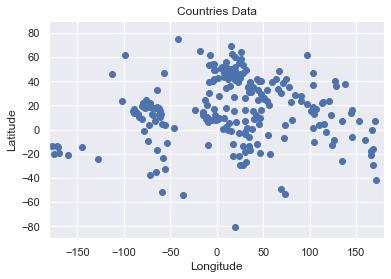

In [11]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.title("Countries Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [12]:
x = raw_data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Use 4 clusters initially.

In [13]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 3, 3, 2, 0, 0, 0, 3, 2, 3, 2, 3, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0,
       1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 2, 1, 0, 3,
       3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 3, 3,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3,
       1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0, 3,
       3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 1, 3, 3, 1, 2, 2, 0,
       0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3])

In [17]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head(5)

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

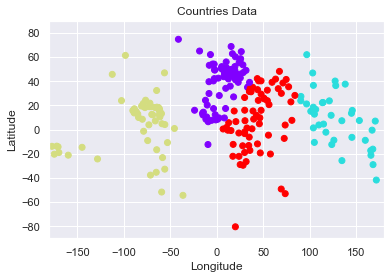

In [19]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.title("Countries Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [22]:
kmeans.inertia_

256573.08675934302

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [29]:
wcss = []
cl_num = 11
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iner = kmeans.inertia_
    wcss.append(wcss_iner)

In [34]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192212.4818949704,
 152258.09346318943,
 126799.1009390775,
 102873.2526445741,
 84927.05022223276,
 76613.59536969497]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

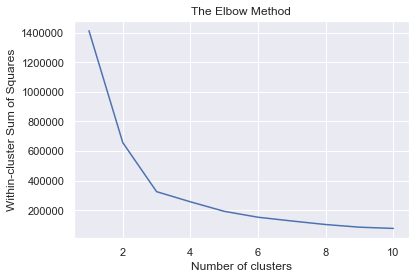

In [36]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [37]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
identified_clusters = kmeans.fit_predict(x)

In [40]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

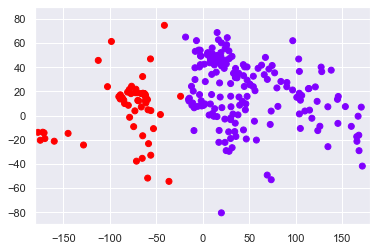

In [42]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [43]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
identified_clusters = kmeans.fit_predict(x)

In [45]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

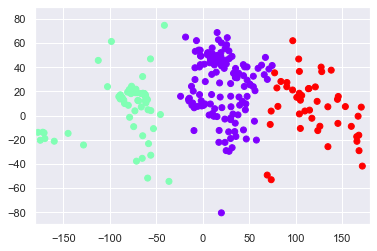

In [46]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()